3rd Gaussian Momento Skewness for lc 2: -2.79
4th Gaussian Moment Kurtosis for lc 2: 7.29
3rd Gaussian Momento Skewness for lc 3: -2.98
4th Gaussian Moment Kurtosis for lc 3: 9.30
3rd Gaussian Momento Skewness for lc 4: -2.62
4th Gaussian Moment Kurtosis for lc 4: 8.44


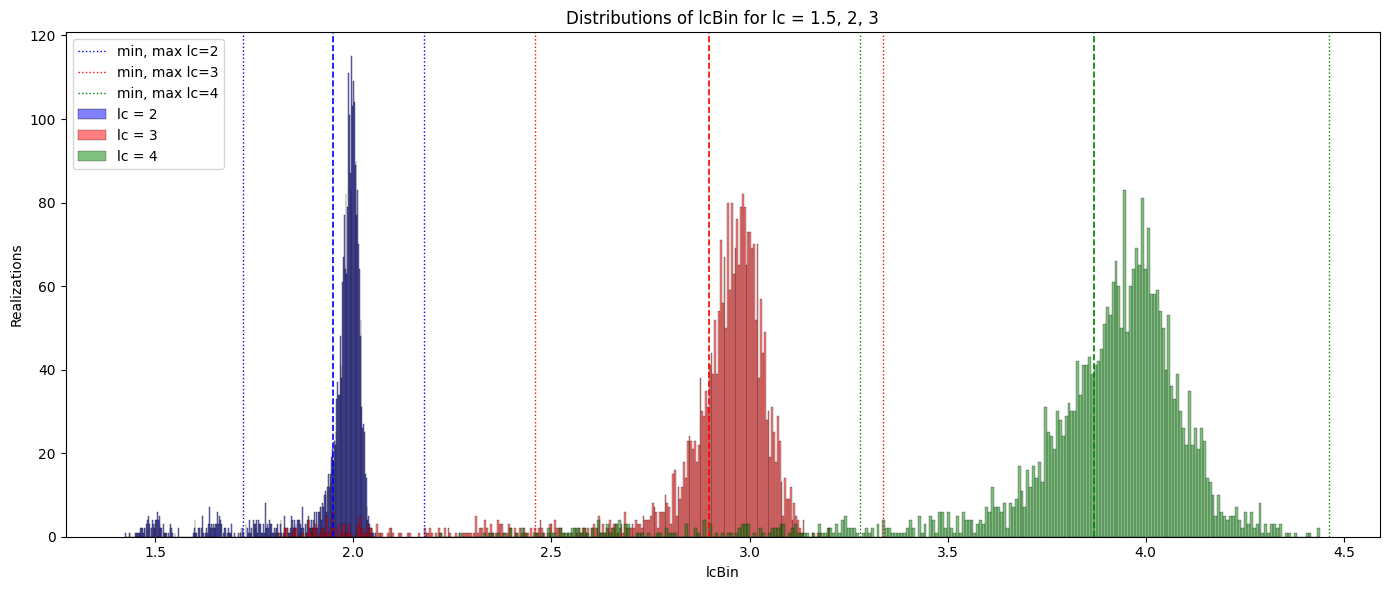

3rd Gaussian Momento Skewness: -2.62
4th Gaussian Moment Kurtosis: 8.44


In [ ]:
### Exploratory Data Analysis ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

data = pd.read_csv('ind_output_3D_test.csv')

def calculate_stats(data, lc_value, column='lcBin'):
    subset = data[data['lc'] == lc_value]
    mean = subset[column].mean()
    std = subset[column].std()
    minlim = mean - 2*std
    maxlim = mean + 2*std
    skewness = skew(subset[column])
    kurt = kurtosis(subset[column])
    return subset, mean, std, minlim, maxlim, skewness, kurt

lc_values = [2,3,4]
stats = {}
for lc in lc_values:
    stats[lc] = calculate_stats(data, lc)
### Exploratory Data Analysis ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

data = pd.read_csv('ind_output_3D_test.csv')

def calculate_stats(data, lc_value, column='lcBin'):
    subset = data[data['lc'] == lc_value]
    mean = subset[column].mean()
    std = subset[column].std()
    minlim = mean - 2*std
    maxlim = mean + 2*std
    skewness = skew(subset[column])
    kurt = kurtosis(subset[column])
    return subset, mean, std, minlim, maxlim, skewness, kurt

lc_values = [2,3,4]
stats = {}
for lc in lc_values:
    stats[lc] = calculate_stats(data, lc)

# Filter data by connectivity structure
data_ics = data[data['con'] == 1]
data_hcs = data[data['con'] == 2]
data_lcs = data[data['con'] == 3]

# Filter data by connectivity structure
data_ics = data[data['con'] == 1]
data_hcs = data[data['con'] == 2]
data_lcs = data[data['con'] == 3]


plt.figure(figsize=(14, 6))
colors = ['blue', 'red', 'green']
for i, lc in enumerate(lc_values):
    subset, mean, std, minlim, maxlim, skewness, kurt = stats[lc]
    sns.histplot(subset['lcBin'], bins=300, kde=False, color=colors[i], alpha=0.5, label=f'lc = {lc}')
    plt.axvline(x=mean, color=colors[i], linewidth=1.2, linestyle='--')  
    plt.axvline(x=minlim, color=colors[i], linewidth=1, linestyle=':', label=f'min, max lc={lc}')
    plt.axvline(x=maxlim, color=colors[i], linewidth=1, linestyle=':')
    print(f'3rd Gaussian Momento Skewness for lc {lc}: {skewness:.2f}')
    print(f'4th Gaussian Moment Kurtosis for lc {lc}: {kurt:.2f}')

plt.legend()
plt.xlabel('lcBin')
plt.ylabel('Realizations')
plt.title('Distributions of lcBin for lc = 1.5, 2, 3')
plt.tight_layout()
plt.show()

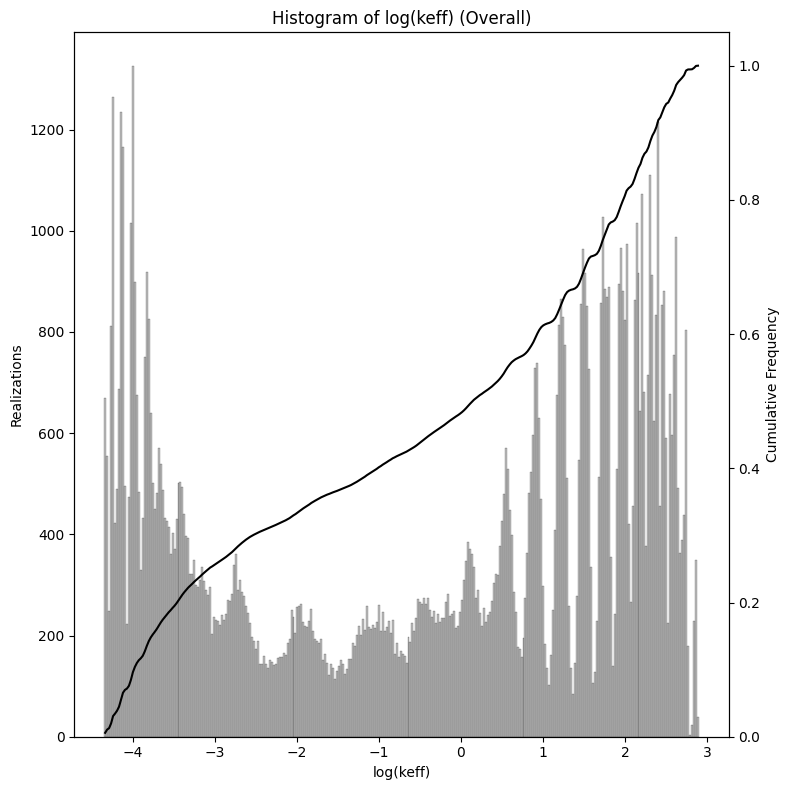

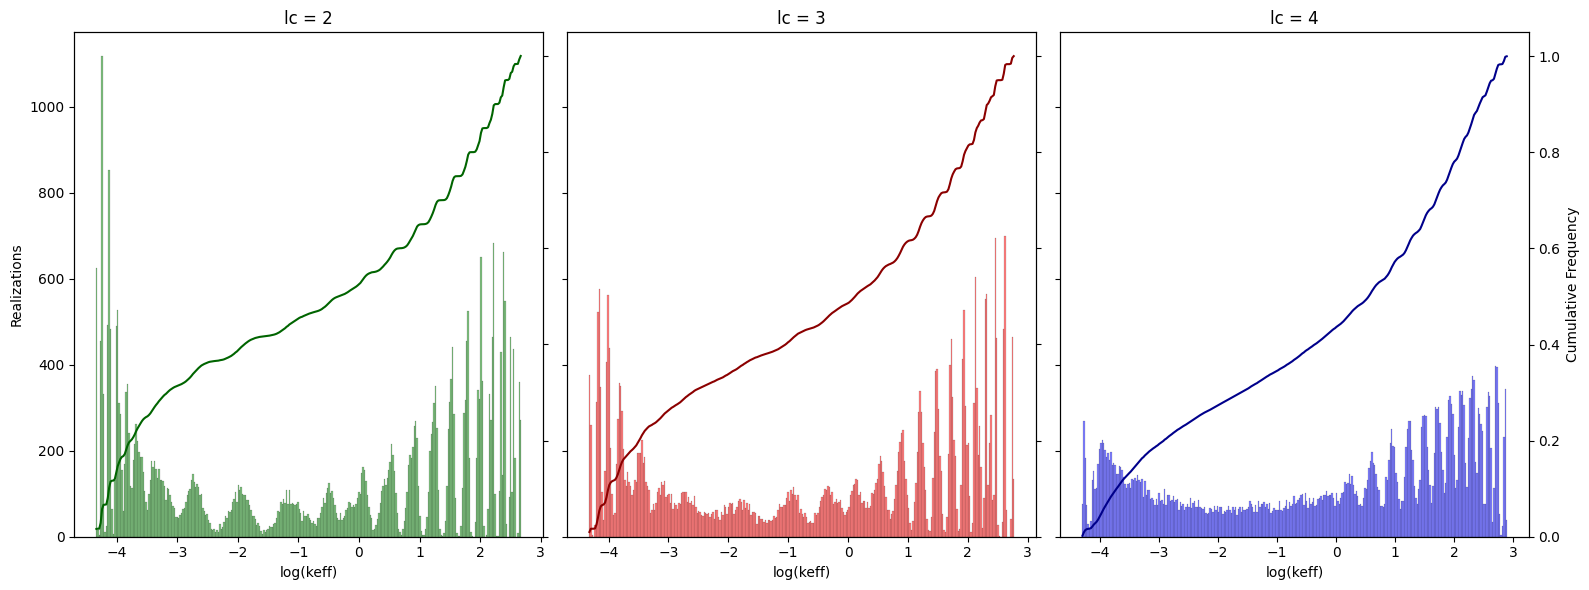

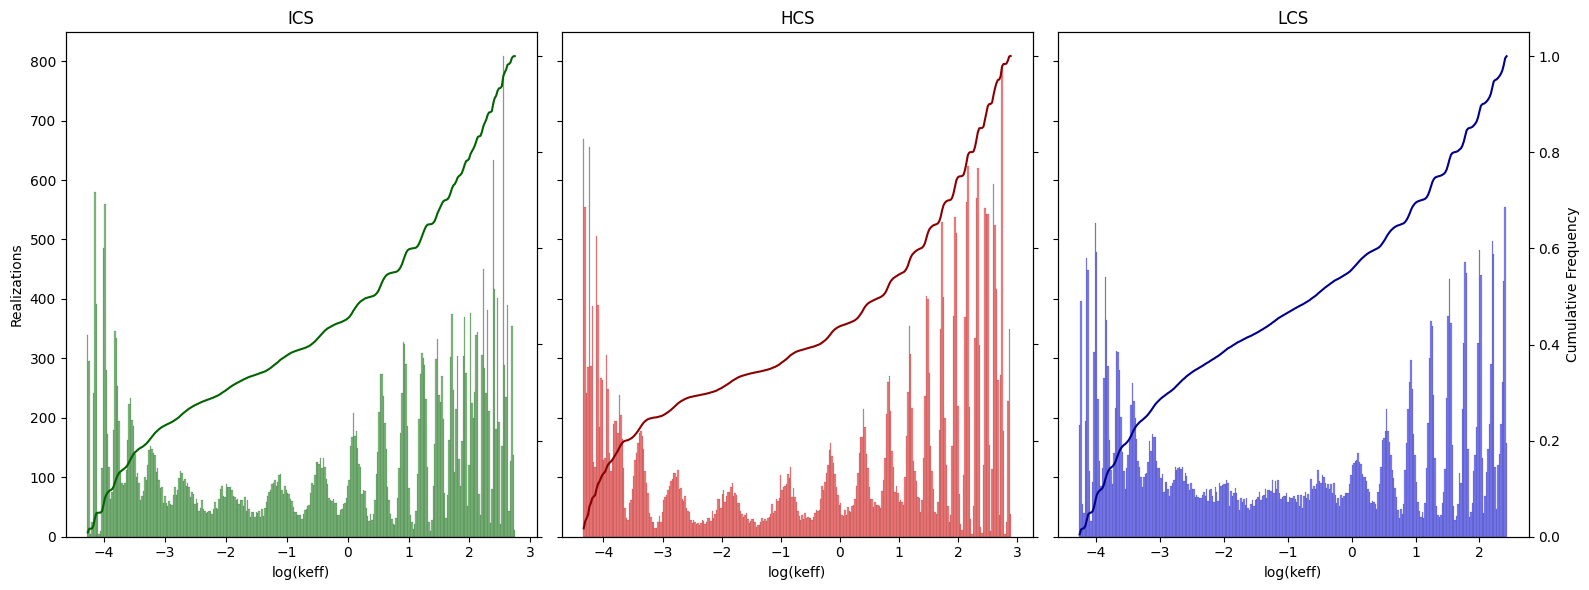

In [7]:
### Fixed Code for Histograms ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def histogram(data, bins, color_fill, color_line, title, ax):
    sns.histplot(np.log(data['keff']), bins=bins, kde=False,
                 color=color_fill, alpha=0.5, stat="count", fill=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('log(keff)')
    ax.set_ylabel('Realizations')
    ax_twin = ax.twinx()
    
    sns.histplot(np.log(data['keff']), bins=bins, kde=False,
                 color=color_line, stat="density", fill=False, cumulative=True,
                 linewidth=1.5, ax=ax_twin, element='poly')
    ax_twin.set_ylabel('Cumulative Frequency')

    if i in [0, 1]:
            ax_twin.set_ylabel('')
            ax_twin.set_yticklabels([])
            
    return ax, ax_twin

bins = 300
colors_fill = ['green', 'red', 'blue']
colors_line = ['darkgreen', 'darkred', 'darkblue']

data = pd.read_csv('ind_output_3D.csv')

lc_values = [1.5, 2, 3]
filtered_data_lc = {lc: data[data['lc'] == lc] for lc in lc_values}

data_ics = data[data['con'] == 1]
data_hcs = data[data['con'] == 2]
data_lcs = data[data['con'] == 3]

plt.figure(figsize=(8, 8))
ax_main = sns.histplot(np.log(data['keff']), bins=bins, kde=False,
                       color='grey', alpha=0.5, stat="count", fill=True, label='Keff')
plt.ylabel('Realizations')
plt.xlabel('log(keff)')
plt.title('Histogram of log(keff) (Overall)')
ax_main_twin = ax_main.twinx()
sns.histplot(np.log(data['keff']), bins=bins, kde=False,
             color='black', stat="density", fill=False, cumulative=True,
             linewidth=1.5, ax=ax_main_twin, label='Cumulative Keff', element='poly')
ax_main_twin.set_ylabel('Cumulative Frequency')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharey=True)
titles = ['lc = 2', 'lc = 3', 'lc = 4']
for i, lc in enumerate(lc_values):
    dataset = filtered_data_lc[lc]
    histogram(dataset, bins, colors_fill[i], colors_line[i], titles[i], axs[i])
    
plt.tight_layout()
plt.show()


fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharey=True)
datasets = [data_ics, data_hcs, data_lcs]
titles = ['ICS', 'HCS', 'LCS']
for i, (dataset, title) in enumerate(zip(datasets, titles)):
    histogram(dataset, bins, colors_fill[i], colors_line[i], title, axs[i])
plt.tight_layout()
plt.show()


In [ ]:
### 2D pc = 0.593, 3D pc = 0.312, para lc = 0.

# prueba 1 3D: L=64, p=[10,50,100], EC=1, var=1, ref=1, lc=2,3,4, real=10. 3D_test_1
